## Import and summarize ratings data

In [1]:
import pandas as pd
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import re
%matplotlib inline

In [3]:
airlines = pd.read_csv('airline_reviews.csv')
airports = pd.read_csv('airport_reviews.csv')
carrier_lookup = pd.read_csv('L_UNIQUE_CARRIERS.csv')

In [4]:
airlines.columns

Index(['Unnamed: 0', 'airline_name', 'link', 'title', 'author',
       'author_country', 'date', 'content', 'aircraft', 'type_traveller',
       'cabin_flown', 'route', 'overall_rating', 'seat_comfort_rating',
       'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'ground_service_rating',
       'wifi_connectivity_rating', 'value_money_rating', 'recommended'],
      dtype='object')

In [5]:
carrier_lookup.columns = ['UNIQUE_CARRIER', 'airline']

In [5]:
airlines.head(2)

,Unnamed: 0,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,...,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,...,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,...,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1


## Make dataframes merge-able

In [8]:
airline_dict = {'AA':'american-airlines', 'AS':'alaska-airlines', 'B6':'jetblue-airways', 'DL':'delta-air-lines',
               'F9':'frontier-airlines', 'HA':'hawaiian-airlines', 'NK':'spirit-airlines', 'OO':'skywest-airlines',
               'UA':'united-airlines', 'VX':'virgin-america', 'WN':'southwest-airlines'}

In [9]:
airline_names = []
for k, v in airline_dict.items():
    airline_names.append(v)

In [10]:
def airline_key(x):
    for k, v in airline_dict.items():
        if x == v:
            return k
    return None

sid = SentimentIntensityAnalyzer()

In [11]:
big_12 = airlines.loc[airlines['airline_name'].isin(airline_names)]
big_12['UNIQUE_CARRIER'] = big_12['airline_name'].apply(airline_key)

/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
big_12['content'] = big_12.loc[:,('content')].apply(lambda x: x.lower()).apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
big_12['airline_name'].value_counts()

spirit-airlines       990
united-airlines       840
american-airlines     612
delta-air-lines       466
frontier-airlines     417
southwest-airlines    379
jetblue-airways       237
alaska-airlines       236
hawaiian-airlines     234
virgin-america        225
skywest-airlines       35
Name: airline_name, dtype: int64

In [8]:
#big_12[big_12['airline_name']=='delta-air-lines']

## LDA Topic Modelling

In [14]:
spirit = big_12.loc[big_12['airline_name']=='spirit-airlines','content']
united = big_12.loc[big_12['airline_name']=='united-airlines','content']
american = big_12.loc[big_12['airline_name']=='american-airlines','content']
delta = big_12.loc[big_12['airline_name']=='delta-air-lines','content']
frontier = big_12.loc[big_12['airline_name']=='frontier-airlines','content']
southwest = big_12.loc[big_12['airline_name']=='southwest-airlines','content']
jetblue = big_12.loc[big_12['airline_name']=='jetblue-airways','content']
alaska = big_12.loc[big_12['airline_name']=='alaska-airlines','content']
hawaiian = big_12.loc[big_12['airline_name']=='hawaiian-airlines','content']
virgin = big_12.loc[big_12['airline_name']=='virgin-america','content']
skywest = big_12.loc[big_12['airline_name']=='skywest-airlines','content']

In [15]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {0}:".format(topic_idx))
        print(" ".join([feature_names[i]
            for i in topic.argsort()[:-n_top_words:-1]]))
    print()

In [16]:
n_samples = 120
n_features = 120
n_topics = 4
n_top_words = 20

In [17]:
tf_vectorizer = CountVectorizer(max_df=0.70, min_df=2, max_features=n_features,
                                stop_words='english', ngram_range=(2,3))

#tf = tf_vectorizer.fit_transform(data_samples)
#virgin_tf = tf_vectorizer.fit_transform(virgin)

In [170]:
#spirit_tf = tf_vectorizer.fit_transform(spirit)
#united_tf = tf_vectorizer.fit_transform(united)
#american_tf = tf_vectorizer.fit_transform(american)
#delta_tf = tf_vectorizer.fit_transform(delta)
#frontier_tf = tf_vectorizer.fit_transform(frontier)
#southwest_tf = tf_vectorizer.fit_transform(southwest)
#jetblue_tf = tf_vectorizer.fit_transform(jetblue)
#alaska_tf = tf_vectorizer.fit_transform(alaska)
#hawaiian_tf = tf_vectorizer.fit_transform(hawaiian)
#virgin_tf = tf_vectorizer.fit_transform(virgin)
skywest_tf = tf_vectorizer.fit_transform(skywest)

In [171]:
len(tf_feature_names)

120

In [172]:
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=80,
                                learning_method='online', learning_offset=50.,
                                random_state=1111)

In [173]:
lda.fit(skywest_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=80, mean_change_tol=0.001,
             n_jobs=1, n_topics=4, perp_tol=0.1, random_state=1111,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [174]:
tf_feature_names = tf_vectorizer.get_feature_names()
len(tf_feature_names)

55

In [175]:
print_top_words(lda, tf_feature_names,n_top_words)

Topic 0:
delta connection skywest delta connection skywest delta cabin staff quick efficient planes flight crew good highly recommend good flight quick efficient check recommend skywest nearly hrs ground staff flight crew boarding pass flight check efficient check ahead schedule min flight
Topic 1:
cabin crew friendly crew efficient friendly seat pitch morning flight crew good breakfast served tea coffee drink beer flight attendant ground staff flight check exit row efficient check ahead schedule excellent service quick efficient quick efficient check planes flight
Topic 2:
cabin crew boarding pass crew polite easy going small snack fly skywest arrived early flight time flights flight skywest does flown skywest flight comfortable recommend flying water served flight attendant western australia nearly hrs airline fly exit row
Topic 3:
flight attendants leg room comfortable flight min flight operated skywest check great baggage allowance time flight flight took western australia say wors

## Apply Sentiment Analysis

In [27]:
big_12['vader_sentiment'] = big_12['content'].apply(lambda x: sid.polarity_scores(x))

/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
big_12['compound_sentiment'] = big_12.loc[:,'vader_sentiment'].apply(lambda x: x['compound'])

/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
#plt.hist(hist)

In [29]:
big_12.head(1)

,Unnamed: 0,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,...,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,UNIQUE_CARRIER,vader_sentiment,compound_sentiment
5793,5793,alaska-airlines,/airline-reviews/alaska-airlines,Alaska Airlines customer review,Katy Montanez,United States,2015-07-26,checked into alaska airlines at the santa rosa...,NaN,Business,...,1.0,1.0,NaN,1.0,1.0,1.0,0,AS,"{'compound': -0.8692, 'pos': 0.072, 'neg': 0.1...",-0.8692


## NLP, Clustering, Dimension Reduction and LDA on Reviews

In [557]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(big_12.content) 

In [558]:
X.shape

(4671, 11335)

In [559]:
pca = PCA(n_components=40)
pca_x = pca.fit_transform(X.toarray())

In [560]:
tsvd = TruncatedSVD(n_components=40, random_state=1125)
tsvd_x = tsvd.fit_transform(X.toarray())

In [561]:
int(X.shape[1]/3)

3778

In [562]:
X.shape[1]

11335

In [ ]:
n_inertia = []

for i in range(1,14):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=30)
    kmeans_pca_array = km.fit_transform(pca_x)
    pca_clusters_array = km.predict(pca_x)
    inertia = km.inertia_
    n_inertia.append(inertia)

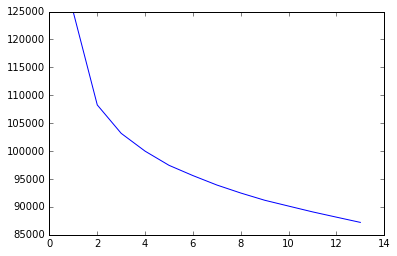

In [39]:
#Analyze Inertia curve for PCA transformed matrix
plt.plot(range(1,14),n_inertia)

In [35]:
tsvd_inertia = []

for i in range(1,14):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=35)
    kmeans_tsvd_array = km.fit_transform(tsvd_x)
    tsvd_clusters_array = km.predict(tsvd_x)
    inertia = km.inertia_
    tsvd_inertia.append(inertia)

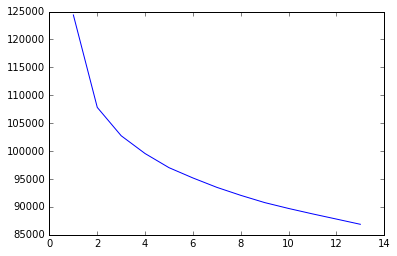

In [36]:
#Analyze Inertia curve for Truncated SVD transformed matrix
plt.plot(range(1,14),tsvd_inertia)

In [30]:
big_12.columns

Index(['Unnamed: 0', 'airline_name', 'link', 'title', 'author',
       'author_country', 'date', 'content', 'aircraft', 'type_traveller',
       'cabin_flown', 'route', 'overall_rating', 'seat_comfort_rating',
       'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'ground_service_rating',
       'wifi_connectivity_rating', 'value_money_rating', 'recommended',
       'UNIQUE_CARRIER', 'vader_sentiment', 'compound_sentiment'],
      dtype='object')

In [31]:
rated_on = ['overall_rating', 'seat_comfort_rating',
       'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'ground_service_rating',
       'wifi_connectivity_rating', 'value_money_rating', 'recommended',
        'vader_sentiment', 'compound_sentiment']

In [39]:
traveller_carrier = big_12.groupby(['type_traveller', 'airline_name'])['overall_rating'].mean()
traveller_overall = big_12.groupby(['type_traveller'])['overall_rating'].mean()
carrier_overall = big_12.groupby(['airline_name'])['overall_rating'].mean()
vader = big_12.groupby(['airline_name'])['compound_sentiment'].mean()
recommended_overall = big_12.groupby(['airline_name'])['recommended'].mean()
cabin = big_12.groupby(['airline_name'])['cabin_staff_rating'].mean()
entertainment = big_12.groupby(['airline_name'])['inflight_entertainment_rating'].mean()
food_bev = big_12.groupby(['airline_name'])['food_beverages_rating'].mean()
ground = big_12.groupby(['airline_name'])['ground_service_rating'].mean()
wifi = big_12.groupby(['airline_name'])['wifi_connectivity_rating'].mean()
value = big_12.groupby(['airline_name'])['value_money_rating'].mean()

In [7]:
#traveller_carrier

In [41]:
leisure = big_12[big_12['type_traveller'] == 'Solo Leisure']
leisure.head()
leisure[leisure['airline_name'] == 'virgin-america']

,Unnamed: 0,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,...,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,UNIQUE_CARRIER,vader_sentiment,compound_sentiment
39192,39192,virgin-america,/airline-reviews/virgin-america,Virgin America customer review,Streb Lovell,Taiwan,2015-07-12,first time with this airline one way from lax ...,NaN,Solo Leisure,...,5.0,4.0,4.0,5.0,4.0,4.0,1,VX,"{'compound': 0.9524, 'pos': 0.335, 'neg': 0.0,...",0.9524
39197,39197,virgin-america,/airline-reviews/virgin-america,Virgin America customer review,Mylinda Barrick,United States,2015-06-13,i had a wonderful experience flying with virgi...,NaN,Solo Leisure,...,5.0,5.0,5.0,NaN,NaN,5.0,1,VX,"{'compound': 0.9606, 'pos': 0.338, 'neg': 0.0,...",0.9606


## Create Dataframe with ratings for each carrier

In [ ]:
array1 = [big_12.groupby(['airline_name'])[i] for i in rated_on]

In [36]:
ratings_df = pd.DataFrame({'overall':carrier_overall,'recommended':recommended_overall,'cabin':cabin,
                         'entertainment':entertainment,'food_bev':food_bev,'ground':ground,'wifi':wifi,'money_value':value,
                          'review_sentiment':vader})
ratings_df.reset_index(level=0, inplace=True)

In [37]:
ratings_df['UNIQUE_CARRIER'] = ratings_df['airline_name'].apply(airline_key)

In [82]:
ratings_df.head(2)

,airline_name,cabin,entertainment,food_bev,ground,money_value,overall,recommended,review_sentiment,wifi,UNIQUE_CARRIER
0,alaska-airlines,3.7,1.7,2.9,4.2,3.2,6.9,0.6,0.4,3.7,AS
1,american-airlines,2.5,2.0,2.3,1.9,2.4,3.7,0.3,-0.0,1.9,AA


In [45]:
#Round Ratings to tenth position

rate_columns = ratings_df.columns[1:10].tolist()

for i in rate_columns:
    ratings_df[i] = ratings_df[i].apply(lambda x:round(x,1))

In [81]:
ratings_df.sort_values('overall', ascending=False)

,airline_name,cabin,entertainment,food_bev,ground,money_value,overall,recommended,review_sentiment,wifi,UNIQUE_CARRIER
10,virgin-america,3.5,3.6,2.9,3.5,3.6,7.3,0.7,0.5,2.5,VX
5,jetblue-airways,3.5,3.4,3.2,3.3,3.5,7.2,0.6,0.4,4.1,B6
6,skywest-airlines,3.2,0.8,0.8,5.0,2.6,7.2,0.5,0.6,NaN,OO
0,alaska-airlines,3.7,1.7,2.9,4.2,3.2,6.9,0.6,0.4,3.7,AS
7,southwest-airlines,3.5,2.5,2.8,2.9,3.4,6.8,0.6,0.3,2.6,WN
2,delta-air-lines,3.4,2.7,2.9,3.1,3.0,6.2,0.5,0.3,2.8,DL
4,hawaiian-airlines,3.6,2.4,3.0,3.1,2.9,6.1,0.6,0.3,1.7,HA
3,frontier-airlines,2.3,1.4,1.3,1.5,2.2,4.1,0.2,-0.1,1.0,F9
1,american-airlines,2.5,2.0,2.3,1.9,2.4,3.7,0.3,-0.0,1.9,AA
9,united-airlines,2.4,2.1,2.0,1.8,2.2,3.4,0.2,0.1,1.9,UA


In [54]:
ratings_df.to_csv('ratings_df.csv')